In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
dataframe = pd.read_csv('Iris.csv')
dataframe

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
  dataframe = dataframe.drop(columns='Id')
  dataframe

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
category = pd.get_dummies(dataframe.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
new_dataframe = pd.concat([dataframe, category], axis=1)
new_dataframe = new_dataframe.drop(columns='Species')
new_dataframe

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
dataset = new_dataframe.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [ ]:
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
attribute = dataset[:,0:4]
# Pilih 3 kolom terakhir sebagai label
label = dataset[:,4:7]

In [ ]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
attribute_scale = min_max_scaler.fit_transform(attribute)
attribute_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [ ]:
attribute_train, attribute_test, label_train, label_test = train_test_split(attribute_scale, label, test_size=0.3)

In [ ]:
model = Sequential([    
                    Dense(64, activation='relu', input_shape=(4,)),    
                    Dense(64, activation='relu'),    
                    Dense(3, activation='softmax'),])

In [ ]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(attribute_train, label_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 1.1019 - accuracy: 0.3048
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0597 - accuracy: 0.3714
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0219 - accuracy: 0.5524
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9886 - accuracy: 0.6286
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9569 - accuracy: 0.6571
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9259 - accuracy: 0.6571
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8962 - accuracy: 0.6571
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8679 - accuracy: 0.6571
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8387 - accuracy: 0.6571
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8098 - accuracy: 0.6571
Epoch 11/100
4/4 [===========

In [ ]:
model.evaluate(attribute_test, label_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.0581 - accuracy: 0.9778


[0.05814388021826744, 0.9777777791023254]

In [ ]:
import matplotlib.pyplot as plt

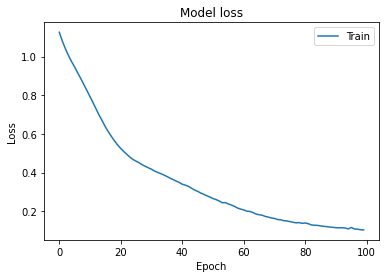

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

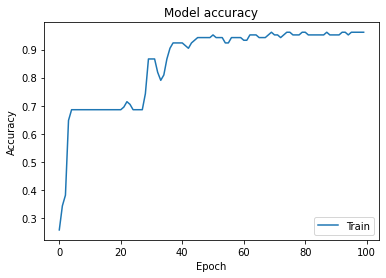

In [ ]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

In [ ]:
import tensorflow as tf
df = pd.read_csv('Iris.csv')
df = df.drop(columns='Id')
category = pd.get_dummies(df.Species)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
dataset = new_df.values
attribute = dataset[:,0:4]
label = dataset[:,4:7]
min_max_scaler = preprocessing.MinMaxScaler()
attribute_scale = min_max_scaler.fit_transform(attribute)
attribute_train, attribute_test, label_train, label_test = train_test_split(attribute_scale, label, test_size=0.3)
model = Sequential([    
                    Dense(64, activation='relu', input_shape=(4,)),    
                    Dense(64, activation='relu'),    
                    Dense(3, activation='sigmoid'),])
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
model.fit(attribute_train, label_train, epochs=50, callbacks=[callbacks])

Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 0.1045 - accuracy: 0.9714

Akurasi telah mencapai >90%!
